# Standardization (Z-score Normalization)
- Standardization transforms data so that the features have a mean of 0 and a standard deviation of 1.
- Formula: X′ = X − μ / σ
- Where:
- X is the original feature value.
- μ is the mean of the feature.
- σ is the standard deviation of the feature.
- X′ is the standardized value.

In [39]:
# import Libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
ds = pd.read_csv('Sales_data.csv')
ds.head()

,Group,Customer_Segment,Sales_Before,Sales_After,Customer_Satisfaction_Before,Customer_Satisfaction_After,Purchase_Made
0,Control,High Value,240.548359,300.007568,74.684767,NaN,No
1,Treatment,High Value,246.862114,381.337555,100.000000,100.000000,Yes
2,Control,High Value,156.978084,179.330464,98.780735,100.000000,No
3,Control,Medium Value,192.126708,229.278031,49.333766,39.811841,Yes
4,NaN,High Value,229.685623,NaN,83.974852,87.738591,Yes


In [41]:
ds.isnull().sum()

Group                           1401
Customer_Segment                1966
Sales_Before                    1522
Sales_After                      767
Customer_Satisfaction_Before    1670
Customer_Satisfaction_After     1640
Purchase_Made                    805
dtype: int64

In [42]:
# 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' it was a waring so clearning it out
ds.fillna({
    'Sales_After': ds['Sales_After'].mean(),
    'Sales_Before': ds['Sales_Before'].mean(),
    'Customer_Satisfaction_After': ds['Customer_Satisfaction_After'].mean(),
    'Customer_Satisfaction_Before': ds['Customer_Satisfaction_Before'].mean()
}, inplace=True)    
ds.isnull().sum()

Group                           1401
Customer_Segment                1966
Sales_Before                       0
Sales_After                        0
Customer_Satisfaction_Before       0
Customer_Satisfaction_After        0
Purchase_Made                    805
dtype: int64

[]

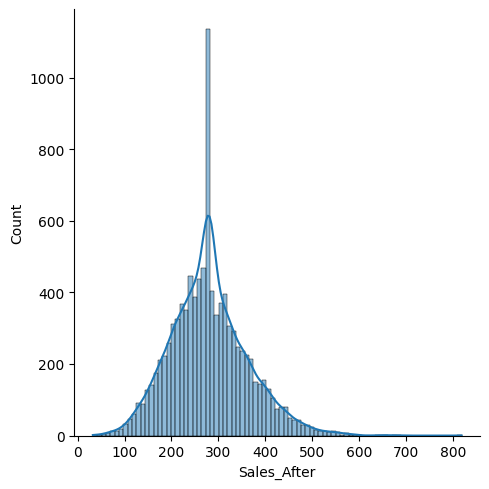

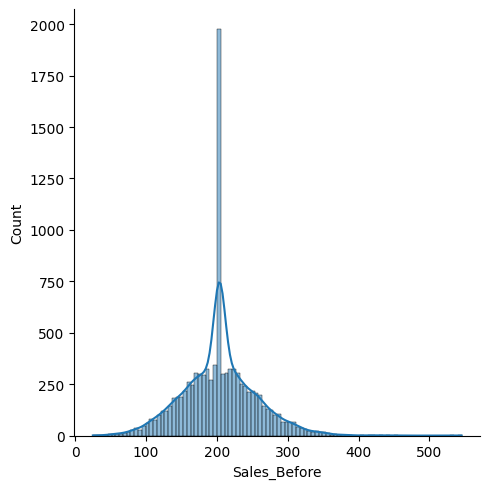

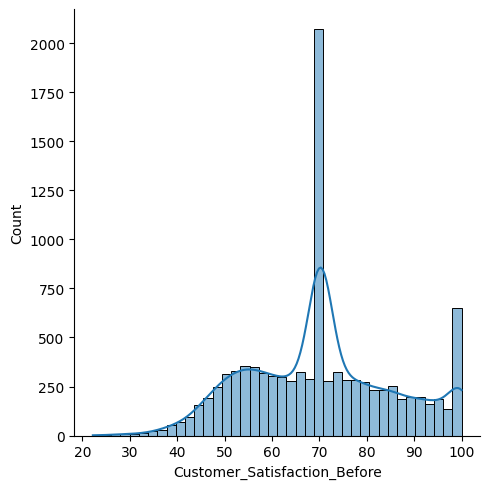

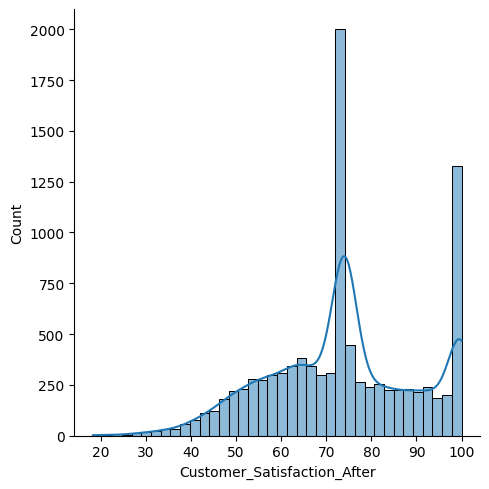

In [43]:
sns.displot(ds['Sales_After'], kde=True)
plt.plot()
sns.displot(ds['Sales_Before'], kde=True)   
plt.plot()
sns.displot(ds['Customer_Satisfaction_Before'], kde=True)
plt.plot()
sns.displot(ds['Customer_Satisfaction_After'], kde=True)   
plt.plot()

In [44]:
# Apply Standardization to standardize the data
scaler = StandardScaler()  # It basically use the formula (x - mean) / std to standardize the data
# StandardScaler() is used to standardize features by removing the mean and scaling to unit variance
# Fit and transform the data
ds[['Sales_After1', 'Sales_Before', 'Customer_Satisfaction_After', 'Customer_Satisfaction_Before']] = scaler.fit_transform(ds[['Sales_After', 'Sales_Before', 'Customer_Satisfaction_After', 'Customer_Satisfaction_Before']])
ds.head()

,Group,Customer_Segment,Sales_Before,Sales_After,Customer_Satisfaction_Before,Customer_Satisfaction_After,Purchase_Made,Sales_After1
0,Control,High Value,0.723741,300.007568,0.286432,0.000000,No,0.237528
1,Treatment,High Value,0.847807,381.337555,1.922255,1.576380,Yes,1.225687
2,Control,High Value,-0.918426,179.330464,1.843468,1.576380,No,-1.228699
3,Control,Medium Value,-0.227751,229.278031,-1.351702,-2.055033,Yes,-0.621836
4,NaN,High Value,0.510287,280.457952,0.886740,0.836596,Yes,0.000000


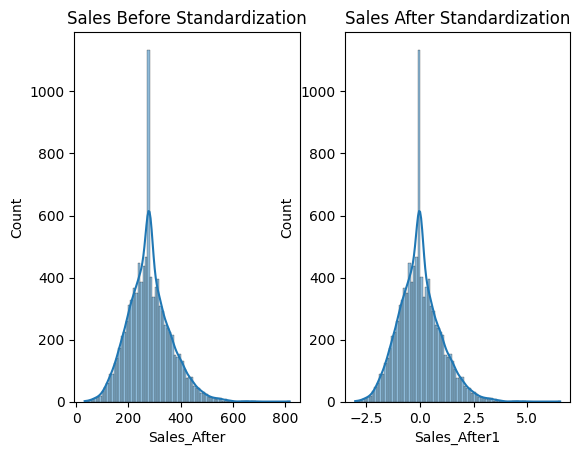

In [50]:
# For After_sales (just to check the distribution after standardization)
plt.subplot(1, 2, 1)
plt.title('Sales Before Standardization')
sns.histplot(ds['Sales_After'], kde=True)

plt.subplot(1, 2, 2)
plt.title('Sales After Standardization')
sns.histplot(ds['Sales_After1'], kde=True)

plt.show()

[]

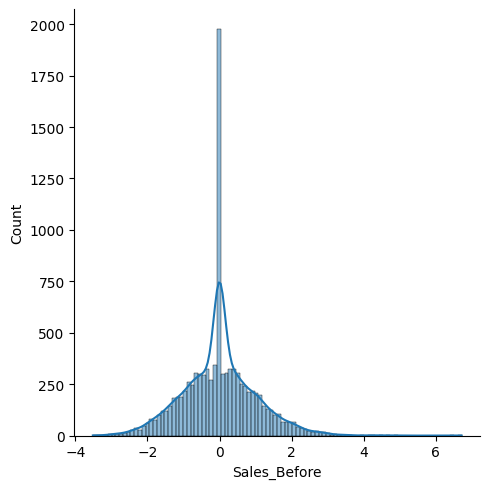

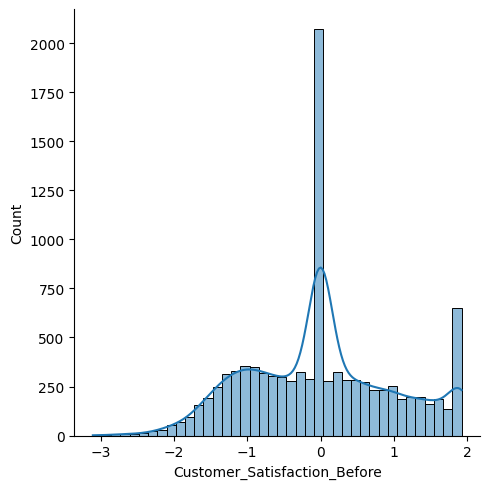

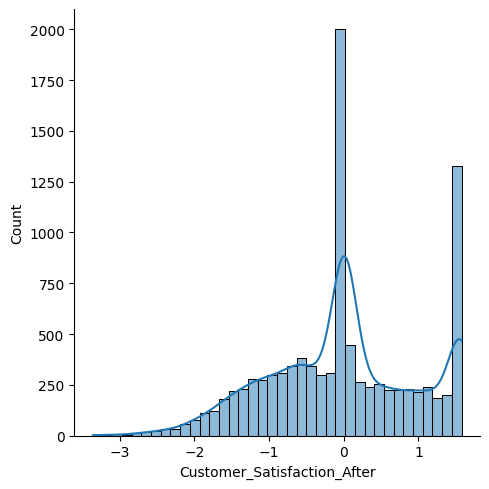

In [46]:
sns.displot(ds['Sales_Before'], kde=True)   
plt.plot()

sns.displot(ds['Customer_Satisfaction_Before'], kde=True)
plt.plot()

sns.displot(ds['Customer_Satisfaction_After'], kde=True)   
plt.plot()